In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

In [170]:
A = 0.28
beta = 0.1
mu = (1+A)/2
nu = (1-A)/2
alpha = np.pi/2- beta
print('mu,nu,alpha',mu,nu,alpha)

mu,nu,alpha 0.64 0.36 1.4707963267948965


(-0.1, 0.1)

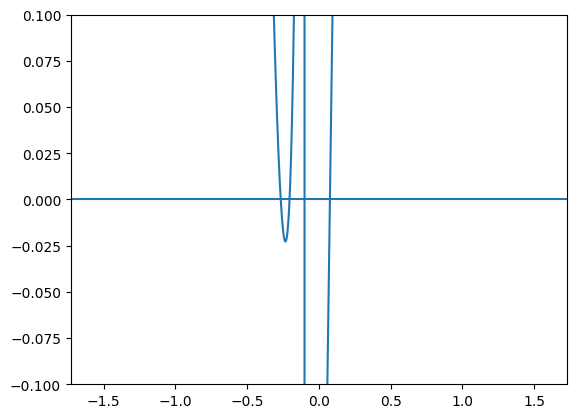

In [171]:
phis = np.linspace(-np.pi/2,np.pi/2,10000)

def dpi_0(psi,alpha,mu,nu):
    A = -mu*np.sin(alpha) + mu*np.sin(psi)/(2*np.cos(alpha - psi)) + nu**2*np.sin(alpha + psi)*np.cos(alpha - psi)/(mu*np.cos(alpha)) + nu**2*np.sin(psi)*np.cos(alpha - psi)/(2*mu*np.cos(alpha)**2)
    return A
plt.plot(phis,dpi_0(phis,alpha,mu,nu))
plt.axhline(0)
plt.ylim(-0.1,0.1)
# plt.xlim(0.025,0.05)

In [172]:
from scipy.optimize import fsolve

initial_guesses = np.linspace(-0.5,0.5, 100)  # 초기 추정값들의 배열
solutions = set()

def dpi_0(psi,alpha,mu,nu):
    A = -mu*np.sin(alpha) + mu*np.sin(psi)/(2*np.cos(alpha - psi)) + nu**2*np.sin(alpha + psi)*np.cos(alpha - psi)/(mu*np.cos(alpha)) + nu**2*np.sin(psi)*np.cos(alpha - psi)/(2*mu*np.cos(alpha)**2)
    return A

for guess in initial_guesses:
    solution = fsolve(dpi_0, guess,args=(alpha,mu,nu))
    solutions.add(round(solution[0], 10))  # 근을 소수점 5자리로 반올림하여 추가
    
Rs = []
psis = []
def get_R(psi,alpha,mu,nu):
    R = - nu*np.cos(alpha-psi)/(mu*np.cos(alpha))
    return R
for psi in solutions:
    R = get_R(psi,alpha,mu,nu)
    if R>0:
        Rs.append(R)
        psis.append(psi)
Rs,psis  = map(np.array,[Rs,psis])
xs_ = Rs*np.cos(psis)
ys_ = Rs*np.sin(psis)
print(list(zip(xs_,ys_)))
print(list(zip(Rs,psis)))

[(0.8960437942839611, -0.24371342685601233), (0.574046708038587, -0.11889747951892159)]
[(0.9285960993374345, -0.2655641056), (0.5862305294386255, -0.2042337917)]


In [155]:
solutions

{-0.2655641056, -0.2042337917, 0.0774202417}

In [92]:
def PLOTX1(X,alpha,mu,nu,r):
    Y=(-5*X*nu*np.cos(alpha)*r**2 + X*nu*np.cos(alpha) - 2*mu*np.cos(alpha)*r**4 + 2*mu*np.cos(alpha)*r**2 - np.sqrt(33*X**2*nu**2*np.cos(alpha)**2*r**4 - 26*X**2*nu**2*np.cos(alpha)**2*r**2 + 9*X**2*nu**2*np.cos(alpha)**2 - 8*X**2*nu**2*r**4 + 16*X**2*nu**2*r**2 - 8*X**2*nu**2 + 12*X*mu*nu*np.cos(alpha)**2*r**6 - 8*X*mu*nu*np.cos(alpha)**2*r**4 - 4*X*mu*nu*np.cos(alpha)**2*r**2 + 8*X*mu*nu*r**6 - 16*X*mu*nu*r**4 + 8*X*mu*nu*r**2 + 4*mu**2*np.cos(alpha)**2*r**8 - 8*mu**2*np.cos(alpha)**2*r**6 + 4*mu**2*np.cos(alpha)**2*r**4))/(4*nu*(r**2 - 1)*np.sin(alpha))
    return Y

def PLOTX2(X,alpha,mu,nu,r):
    Y=(-5*X*nu*np.cos(alpha)*r**2 + X*nu*np.cos(alpha) - 2*mu*np.cos(alpha)*r**4 + 2*mu*np.cos(alpha)*r**2 + np.sqrt(33*X**2*nu**2*np.cos(alpha)**2*r**4 - 26*X**2*nu**2*np.cos(alpha)**2*r**2 + 9*X**2*nu**2*np.cos(alpha)**2 - 8*X**2*nu**2*r**4 + 16*X**2*nu**2*r**2 - 8*X**2*nu**2 + 12*X*mu*nu*np.cos(alpha)**2*r**6 - 8*X*mu*nu*np.cos(alpha)**2*r**4 - 4*X*mu*nu*np.cos(alpha)**2*r**2 + 8*X*mu*nu*r**6 - 16*X*mu*nu*r**4 + 8*X*mu*nu*r**2 + 4*mu**2*np.cos(alpha)**2*r**8 - 8*mu**2*np.cos(alpha)**2*r**6 + 4*mu**2*np.cos(alpha)**2*r**4))/(4*nu*(r**2 - 1)*np.sin(alpha))
    return Y

def PLOTX3(X,alpha,mu,nu,r):
    Y =(-np.sqrt((X*nu + mu*r**2)*(r - 1)*(r + 1)*(-23*X*nu*np.sin(alpha)**2*r**2 - 9*X*nu*np.sin(alpha)**2 + 24*X*nu*r**2 + 8*X*nu + mu*np.sin(alpha)**2*r**4 - mu*np.sin(alpha)**2*r**2)) + (X*nu + mu*r**2)*(r - 1)*(r + 1)*np.sin(alpha))/(2*nu*(3*r**2 + 1)*np.cos(alpha))
    return Y


def PLOTX4(X,alpha,mu,nu,r):
    Y =(np.sqrt((X*nu + mu*r**2)*(r - 1)*(r + 1)*(-23*X*nu*np.sin(alpha)**2*r**2 - 9*X*nu*np.sin(alpha)**2 + 24*X*nu*r**2 + 8*X*nu + mu*np.sin(alpha)**2*r**4 - mu*np.sin(alpha)**2*r**2)) + (X*nu + mu*r**2)*(r - 1)*(r + 1)*np.sin(alpha))/(2*nu*(3*r**2 + 1)*np.cos(alpha))
    return Y

In [97]:
def Fun(r,psi,alpha,mu,nu):
    dr = (1-r**2)*(mu*r*np.cos(alpha)+nu*np.cos(alpha-psi))
    dpsi = (1+r**2)/(2*r)*(mu*r*np.sin(alpha)-nu*np.sin(psi-alpha)) - mu*np.sin(alpha) -nu*r*np.sin(psi+alpha)
    return dr,dpsi

RS = np.linspace(0,1.5,3001)
PSI = np.linspace(-np.pi,np.pi,3001)
RR,PSIS =np.meshgrid(RS,PSI)
DR,DPSI = Fun(RR,PSIS,alpha,mu,nu)
X = RR*np.cos(PSIS)
Y = RR*np.sin(PSIS)

DX = DR*X/RR - DPSI*Y
DY = DR*Y/RR + DPSI*X

C:\Users\kim9y\AppData\Local\Temp\ipykernel_24292\468087625.py:3: RuntimeWarning: divide by zero encountered in divide
  dpsi = (1+r**2)/(2*r)*(mu*r*np.sin(alpha)-nu*np.sin(psi-alpha)) - mu*np.sin(alpha) -nu*r*np.sin(psi+alpha)
C:\Users\kim9y\AppData\Local\Temp\ipykernel_24292\468087625.py:13: RuntimeWarning: invalid value encountered in divide
  DX = DR*X/RR - DPSI*Y
C:\Users\kim9y\AppData\Local\Temp\ipykernel_24292\468087625.py:13: RuntimeWarning: invalid value encountered in multiply
  DX = DR*X/RR - DPSI*Y
C:\Users\kim9y\AppData\Local\Temp\ipykernel_24292\468087625.py:14: RuntimeWarning: invalid value encountered in divide
  DY = DR*Y/RR + DPSI*X
C:\Users\kim9y\AppData\Local\Temp\ipykernel_24292\468087625.py:14: RuntimeWarning: invalid value encountered in multiply
  DY = DR*Y/RR + DPSI*X


In [98]:
RS = np.linspace(0,1,301)
PSI = np.linspace(-np.pi,np.pi,301)
RR,PSIS =np.meshgrid(RS,PSI)
DR,DPSI = Fun(RR,PSIS,alpha,mu,nu)
X = RR*np.cos(PSIS)
Y = RR*np.sin(PSIS)

DX = DR*X/RR - DPSI*Y
DY = DR*Y/RR + DPSI*X
M = (np.hypot(DX,DY))
U = DX / np.sqrt(DX**2 + DY**2);
V = DY / np.sqrt(DX**2 + DY**2);

C:\Users\kim9y\AppData\Local\Temp\ipykernel_24292\468087625.py:3: RuntimeWarning: divide by zero encountered in divide
  dpsi = (1+r**2)/(2*r)*(mu*r*np.sin(alpha)-nu*np.sin(psi-alpha)) - mu*np.sin(alpha) -nu*r*np.sin(psi+alpha)
C:\Users\kim9y\AppData\Local\Temp\ipykernel_24292\3268089642.py:8: RuntimeWarning: invalid value encountered in divide
  DX = DR*X/RR - DPSI*Y
C:\Users\kim9y\AppData\Local\Temp\ipykernel_24292\3268089642.py:8: RuntimeWarning: invalid value encountered in multiply
  DX = DR*X/RR - DPSI*Y
C:\Users\kim9y\AppData\Local\Temp\ipykernel_24292\3268089642.py:9: RuntimeWarning: invalid value encountered in divide
  DY = DR*Y/RR + DPSI*X
C:\Users\kim9y\AppData\Local\Temp\ipykernel_24292\3268089642.py:9: RuntimeWarning: invalid value encountered in multiply
  DY = DR*Y/RR + DPSI*X


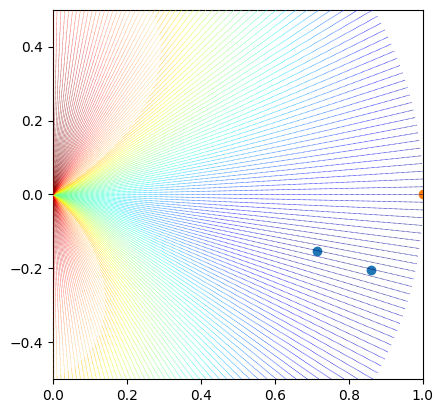

In [249]:
Q = plt.quiver(X,Y,DX,DY,M,pivot='mid',cmap='jet',zorder=3)
plt.scatter(Rs*np.cos(psis),Rs*np.sin(psis))
plt.scatter(1,0)
plt.ylim(-0.5,0.5)
plt.xlim(0,1)
plt.gca().set_aspect(1)

In [250]:
M = (np.hypot(DX,DY))

C:\Users\kim9y\AppData\Local\Temp\ipykernel_49568\1483721758.py:1: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(X,Y,M,vmax=0.1)


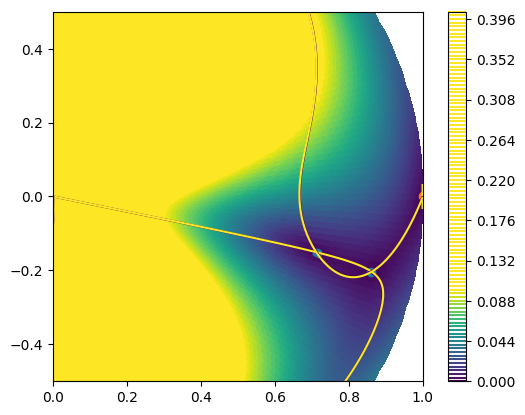

In [251]:
plt.pcolormesh(X,Y,M,vmax=0.1)

plt.contour(X,Y,M,levels=100,vmax=0.1)
plt.colorbar()
plt.contour(X,Y,DX,levels=[0-1e-4,0+1e-4])
plt.contour(X,Y,DY,levels=[0-1e-4,0+1e-4])
plt.scatter(Rs*np.cos(psis),Rs*np.sin(psis))
plt.scatter(1,0)
plt.ylim(-0.5,0.5)
plt.xlim(0,1)
plt.gca().set_aspect(1)


C:\Users\kim9y\AppData\Local\Temp\ipykernel_49568\351482141.py:1: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(X,-Y,M,vmax=0.1)


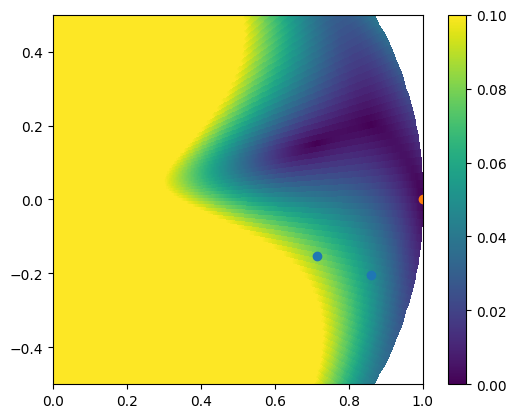

In [252]:
plt.pcolormesh(X,-Y,M,vmax=0.1)
plt.colorbar()
plt.scatter(Rs*np.cos(psis),Rs*np.sin(psis))
plt.scatter(1,0)
plt.ylim(-0.5,0.5)
plt.xlim(0,1)
plt.gca().set_aspect(1)

C:\Users\kim9y\AppData\Local\Temp\ipykernel_49568\4270238996.py:2: RuntimeWarning: invalid value encountered in sqrt
  Y=(-5*X*nu*np.cos(alpha)*r**2 + X*nu*np.cos(alpha) - 2*mu*np.cos(alpha)*r**4 + 2*mu*np.cos(alpha)*r**2 - np.sqrt(33*X**2*nu**2*np.cos(alpha)**2*r**4 - 26*X**2*nu**2*np.cos(alpha)**2*r**2 + 9*X**2*nu**2*np.cos(alpha)**2 - 8*X**2*nu**2*r**4 + 16*X**2*nu**2*r**2 - 8*X**2*nu**2 + 12*X*mu*nu*np.cos(alpha)**2*r**6 - 8*X*mu*nu*np.cos(alpha)**2*r**4 - 4*X*mu*nu*np.cos(alpha)**2*r**2 + 8*X*mu*nu*r**6 - 16*X*mu*nu*r**4 + 8*X*mu*nu*r**2 + 4*mu**2*np.cos(alpha)**2*r**8 - 8*mu**2*np.cos(alpha)**2*r**6 + 4*mu**2*np.cos(alpha)**2*r**4))/(4*nu*(r**2 - 1)*np.sin(alpha))
C:\Users\kim9y\AppData\Local\Temp\ipykernel_49568\4270238996.py:6: RuntimeWarning: invalid value encountered in sqrt
  Y=(-5*X*nu*np.cos(alpha)*r**2 + X*nu*np.cos(alpha) - 2*mu*np.cos(alpha)*r**4 + 2*mu*np.cos(alpha)*r**2 + np.sqrt(33*X**2*nu**2*np.cos(alpha)**2*r**4 - 26*X**2*nu**2*np.cos(alpha)**2*r**2 + 9*X**2*nu**2*

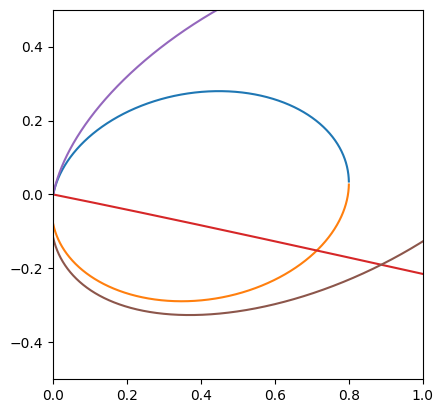

In [253]:
xs = np.linspace(0,1,10000)

plt.ylim(-0.5,0.5)
plt.xlim(0,1)
plt.plot(xs,PLOTX1(xs,alpha,mu,nu,0.72916031))
plt.plot(xs,PLOTX2(xs,alpha,mu,nu,0.72916031))
plt.plot(xs,PLOTX3(xs,alpha,mu,nu,0.72916031))
plt.plot(xs,PLOTX4(xs,alpha,mu,nu,0.72916031))



plt.plot(xs,PLOTX1(xs,alpha,mu,nu,0.88341202))
plt.plot(xs,PLOTX2(xs,alpha,mu,nu,0.88341202))
plt.gca().set_aspect(1)



# r을 바꾸어 가면서 X Y로 표현

In [99]:
def Fun(X,Y,alpha,mu,nu):
    dx = (X**2*nu*np.cos(alpha) + Y*nu*(X*np.sin(alpha) + Y*np.cos(alpha))/2 + (X**2 + Y**2)*(-2*X**2*nu*np.cos(alpha) - X*Y*nu*np.sin(alpha) - 2*X*mu*(X**2 + Y**2)*np.cos(alpha) + 2*X*mu*np.cos(alpha) + 3*Y**2*nu*np.cos(alpha) - Y*mu*(X**2 + Y**2)*np.sin(alpha) + Y*mu*np.sin(alpha))/2)/(X**2 + Y**2)
    dy = (X*nu*(X*np.sin(alpha) + Y*np.cos(alpha))/2 + Y**2*nu*np.sin(alpha) + (X**2 + Y**2)*(-X**2*nu*np.sin(alpha) - 5*X*Y*nu*np.cos(alpha) + X*mu*(X**2 + Y**2)*np.sin(alpha) - X*mu*np.sin(alpha) - 2*Y**2*nu*np.sin(alpha) - 2*Y*mu*(X**2 + Y**2)*np.cos(alpha) + 2*Y*mu*np.cos(alpha))/2)/(X**2 + Y**2)
    return dx,dy

In [100]:
def RK4(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n,len(y0)))
    y[0] = y0

    for i in range(n - 1):
        h = t[i + 1] - t[i]
        k1 = f(y[i], t[i], *args)
        k2 = f(y[i] + k1 * h / 2.0, t[i] + h / 2.0, *args)
        k3 = f(y[i] + k2 * h / 2.0, t[i] + h / 2.0, *args)
        k4 = f(y[i] + k3 * h, t[i] + h, *args)
        y[i + 1] = y[i] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return y


xs = np.linspace(-3,-1e-5,1000)

In [101]:
from scipy.integrate import odeint

In [102]:
def d_fun(XY,t,alpha,mu,nu):
    X,Y = XY
    dx = (X**2*nu*np.cos(alpha) + Y*nu*(X*np.sin(alpha) + Y*np.cos(alpha))/2 + (X**2 + Y**2)*(-2*X**2*nu*np.cos(alpha) - X*Y*nu*np.sin(alpha) - 2*X*mu*(X**2 + Y**2)*np.cos(alpha) + 2*X*mu*np.cos(alpha) + 3*Y**2*nu*np.cos(alpha) - Y*mu*(X**2 + Y**2)*np.sin(alpha) + Y*mu*np.sin(alpha))/2)/(X**2 + Y**2)
    dy = (X*nu*(X*np.sin(alpha) + Y*np.cos(alpha))/2 + Y**2*nu*np.sin(alpha) + (X**2 + Y**2)*(-X**2*nu*np.sin(alpha) - 5*X*Y*nu*np.cos(alpha) + X*mu*(X**2 + Y**2)*np.sin(alpha) - X*mu*np.sin(alpha) - 2*Y**2*nu*np.sin(alpha) - 2*Y*mu*(X**2 + Y**2)*np.cos(alpha) + 2*Y*mu*np.cos(alpha))/2)/(X**2 + Y**2)
    return np.array([dx,dy])


def d_Mfun(XY,t,alpha,mu,nu):
    X,Y = XY
    dx = (X**2*nu*np.cos(alpha) + Y*nu*(X*np.sin(alpha) + Y*np.cos(alpha))/2 + (X**2 + Y**2)*(-2*X**2*nu*np.cos(alpha) - X*Y*nu*np.sin(alpha) - 2*X*mu*(X**2 + Y**2)*np.cos(alpha) + 2*X*mu*np.cos(alpha) + 3*Y**2*nu*np.cos(alpha) - Y*mu*(X**2 + Y**2)*np.sin(alpha) + Y*mu*np.sin(alpha))/2)/(X**2 + Y**2)
    dy = (X*nu*(X*np.sin(alpha) + Y*np.cos(alpha))/2 + Y**2*nu*np.sin(alpha) + (X**2 + Y**2)*(-X**2*nu*np.sin(alpha) - 5*X*Y*nu*np.cos(alpha) + X*mu*(X**2 + Y**2)*np.sin(alpha) - X*mu*np.sin(alpha) - 2*Y**2*nu*np.sin(alpha) - 2*Y*mu*(X**2 + Y**2)*np.cos(alpha) + 2*Y*mu*np.cos(alpha))/2)/(X**2 + Y**2)
    return np.array([-dx,-dy])

In [138]:
xs = np.linspace(0.0,1,10000)
ys = np.linspace(-0.5,0.5,10000)
X,Y = np.meshgrid(xs,ys)

In [139]:
DX,DY = Fun(X,Y,alpha,mu,nu)
M = (np.hypot(DX,DY))
# U = DX / np.sqrt(DX**2 + DY**2);
# V = DY / np.sqrt(DX**2 + DY**2);

In [120]:
X_0 =(Rs*np.cos(psis))[0]
Y_0 =(Rs*np.sin(psis))[0]
Z = np.array([X_0,Y_0])

In [123]:
EV1 = np.array([0.763873221379243, 0.645366331365139])
EV2 = np.array([-0.101170157705608, 1.22364308672871])

In [124]:
u0.flatten()

array([ 0.89604329, -0.24370731])

In [125]:
RK4(d_fun,u0.flatten(),t,args=(alpha,mu,nu))

array([[ 8.96043288e-01, -2.43707309e-01],
       [ 8.96043291e-01, -2.43707336e-01],
       [ 8.96043293e-01, -2.43707364e-01],
       ...,
       [ 1.00000000e+00, -3.25895502e-14],
       [ 1.00000000e+00, -3.25895502e-14],
       [ 1.00000000e+00, -3.25895502e-14]])

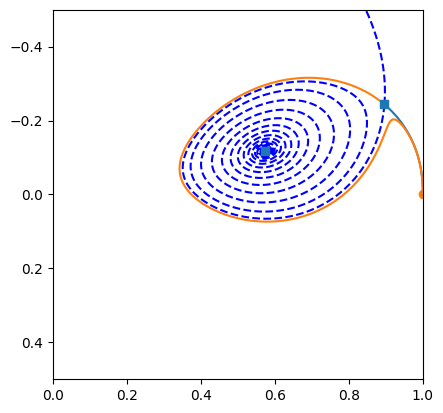

In [126]:
u0 = Z + EV1/200000
t = np.linspace(0,1000,30000)
u = RK4(d_fun,u0.flatten(),t,args=(alpha,mu,nu))
plt.plot(u[:,0],u[:,1],lw=1.5,label=r'$\vec{x}(0)=(%.1f,%.1f)$'%(u0[0],u0[1]))

u0 = Z - EV1/200000
u = RK4(d_fun,u0.flatten(),t,args=(alpha,mu,nu))
plt.plot(u[:,0],u[:,1],lw=1.5,label=r'$\vec{x}(0)=(%.1f,%.1f)$'%(u0[0],u0[1]))

u0 = Z - EV2/200000
u = RK4(d_Mfun,u0.flatten(),t,args=(alpha,mu,nu))
plt.plot(u[:,0],u[:,1],lw=1.5,label=r'$\vec{x}(0)=(%.1f,%.1f)$'%(u0[0],u0[1]),ls='--',color='blue')

u0 = Z + EV2/200000

u = RK4(d_Mfun,u0.flatten(),t,args=(alpha,mu,nu))
plt.plot(u[:,0],u[:,1],lw=1.5,label=r'$\vec{x}(0)=(%.1f,%.1f)$'%(u0[0],u0[1]),ls='--',color='blue')

plt.scatter(Rs*np.cos(psis),Rs*np.sin(psis),zorder=3,marker='s')
plt.scatter(1,0)
plt.ylim(0.5,-0.5)
plt.xlim(0,1)
plt.gca().set_aspect(1)

In [133]:
x_,y_ = [],[]
z1 =  Z - EV1/20
z2 =  Z + EV1/20
z3 =  Z - EV2/20
z4 =  Z + EV2/20
z5 = (1,0)
for x_temp,y_temp in [z1,z2,z3,z4]:
    x_.append(x_temp)
    y_.append(y_temp)

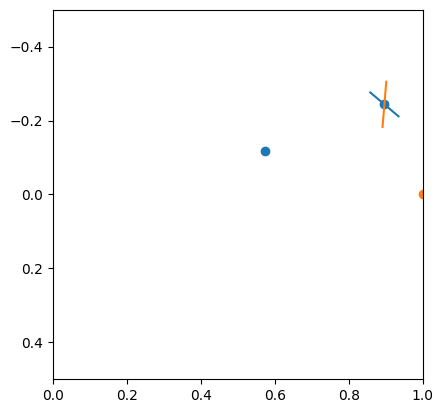

In [142]:
# Q = plt.quiver(X,Y,U,V,M,pivot='mid',cmap='jet',zorder=3)
seed_points = np.array([x_,y_])
# seed_points = np.array([[*(X_0-0.950682959640321/200,X_0+0.950682959640321/200),*(X_0+0.3875/200,X_0-0.3875/200),1], [*(Y_0-0.310164327815949/200,Y_0+0.310164327815949/200),*(Y_0-0.9254/200,Y_0+0.9254/200),0]])
# plt.streamplot(X,Y,DX,DY,cmap='jet',zorder=2)
# plt.streamplot(X,Y,DX,DY,cmap='jet',zorder=3,start_points=seed_points.T)
plt.scatter(Rs*np.cos(psis),Rs*np.sin(psis))

plt.plot(x_[:2],y_[:2])
plt.plot(x_[2:],y_[2:])
# plt.plot((X_0-0.950682959640321/20,X_0+0.950682959640321/20),(Y_0-0.310164327815949/20,Y_0+0.310164327815949/20))
# plt.plot((X_0+0.3875/20,X_0-0.3875/20),(Y_0-0.9254/20,Y_0+0.9254/20))
# plt.plot((0,-0.387),(0,0.9254))
plt.scatter(1,0)
plt.ylim(0.5,-0.5)
plt.xlim(0,1)
plt.gca().set_aspect(1)

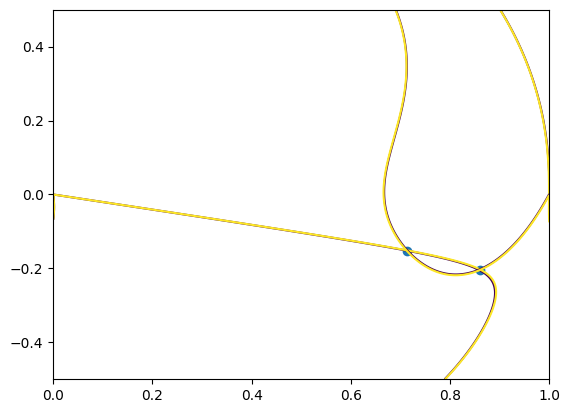

In [159]:
plt.contour(X,Y,DX,levels=[0-1e-4,0+1e-4])
plt.contour(X,Y,DY,levels=[0-1e-4,0+1e-4])
plt.scatter(Rs*np.cos(psis),Rs*np.sin(psis))

# PLOT r psi

In [157]:
import sympy as sp

In [220]:
def Fun(rpsi,t,alpha,mu,nu):
    r,psi =rpsi
    dr = (1-r**2)*(mu*r*np.cos(alpha)+nu*np.cos(alpha-psi))
    dpsi = (1+r**2)/(2*r)*(mu*r*np.sin(alpha)-nu*np.sin(psi-alpha)) - mu*np.sin(alpha) -nu*r*np.sin(psi+alpha)
    return np.array([dr,dpsi])

def MFun(rpsi,t,alpha,mu,nu):
    r,psi =rpsi
    dr = (1-r**2)*(mu*r*np.cos(alpha)+nu*np.cos(alpha-psi))
    dpsi = (1+r**2)/(2*r)*(mu*r*np.sin(alpha)-nu*np.sin(psi-alpha)) - mu*np.sin(alpha) -nu*r*np.sin(psi+alpha)
    return np.array([-dr,-dpsi])

In [159]:
r1 = sp.symbols('r', real = True)
psi1 = sp.symbols('psi', real = True)
mu1,nu1,alpha1 = sp.symbols('mu nu alpha',real=True)

dr = (1-r1**2)*(mu1*r1*sp.cos(alpha1)+nu1*sp.cos(alpha1-psi1))
dpsi = (1+r1**2)/(2*r1)*(mu1*r1*sp.sin(alpha1)-nu1*sp.sin(psi1-alpha1)) - mu1*sp.sin(alpha1) -nu1*r1*sp.sin(psi1+alpha1)


In [160]:
F = sp.Matrix([dr,dpsi])
J = F.jacobian([r1,psi1])

In [177]:
for i,(r_,psi_) in enumerate(zip(Rs,psis)):
    print(Rs[i],psis[i],r_,psi_)
    JJ = J.subs([(r1,r_),(psi1,psi_),(alpha1,alpha),(nu1,nu),(mu1,mu)])
    D = JJ.det()
    tri = JJ.trace()
    Delta = tri**2 -4*D
    print(D,tri,Delta)
    if D<0:
        print('Saddle')
    elif D>0:
        if tri>0:
            print('unstable')
        else:
            print('stable')
        if Delta>0:
            print('sink/source')
        else:
            print('spiral')
            
    break
    

0.9285960993374345 -0.2655641056 0.9285960993374345 -0.2655641056
-0.0116163307125593 -0.0512096128619782 0.0490877472997108
Saddle


In [178]:
JJ.eigenvals()

{0.0851739678216975: 1, -0.136383580683676: 1}

In [179]:
d_r1 = JJ.eigenvects()[0][-1][0][0]
d_p1 = JJ.eigenvects()[0][-1][0][1]

d_r2 = JJ.eigenvects()[1][-1][0][0]
d_p2 = JJ.eigenvects()[1][-1][0][1]

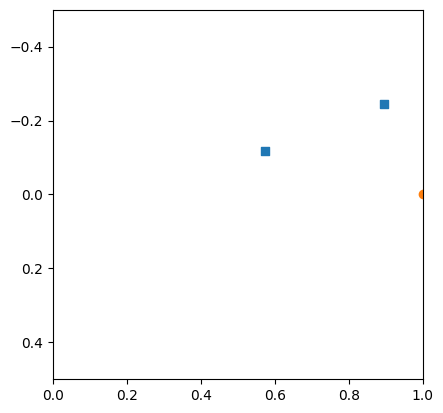

In [180]:
plt.scatter(Rs*np.cos(psis),Rs*np.sin(psis),zorder=3,marker='s')
plt.scatter(1,0)
plt.ylim(0.5,-0.5)
plt.xlim(0,1)
plt.gca().set_aspect(1)

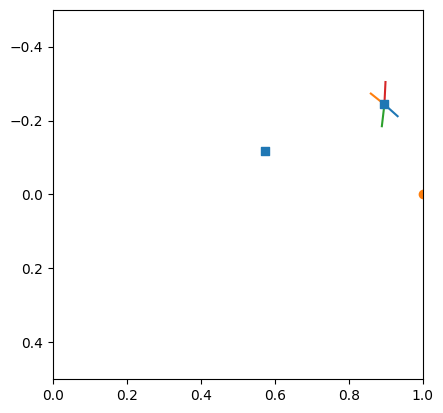

In [233]:
DP_ = np.array([psis[0],psis[0]+d_p1/20,psis[0]-d_p1/20,psis[0]+d_p2/20,psis[0]-d_p2/20,psis[0],psis[1],0],dtype=float)
DR_ = np.array([Rs[0],Rs[0]+d_r1/20,Rs[0]-d_r1/20,Rs[0]+d_r2/20,Rs[0]-d_r2/20,Rs[0],Rs[1],1],dtype=float)

X_ = DR_*np.cos(DP_)
Y_ = DR_*np.sin(DP_)
plt.plot([X_[0],X_[1]],[Y_[0],Y_[1]])
plt.plot([X_[0],X_[2]],[Y_[0],Y_[2]])
plt.plot([X_[0],X_[3]],[Y_[0],Y_[3]])
plt.plot([X_[0],X_[4]],[Y_[0],Y_[4]])
plt.scatter(Rs*np.cos(psis),Rs*np.sin(psis),zorder=3,marker='s')
plt.scatter(1,0)
plt.ylim(0.5,-0.5)
plt.xlim(0,1)
plt.gca().set_aspect(1)

In [234]:
t = np.arange(0,500,0.001)

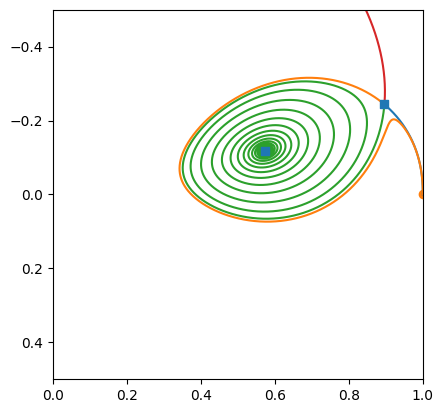

In [231]:
for i in range(1,3):
    u = RK4(Fun,[DR_[i],DP_[i]],t,args=(alpha,mu,nu))
    RR,PP = u[:,0],u[:,1]
    XX = RR*np.cos(PP)
    YY = RR*np.sin(PP)
    plt.plot(XX,YY,lw=1.5,label=r'$\vec{x}(0)=(%.1f,%.1f)$'%(u0[0],u0[1]))

for i in range(3,5):
    u = RK4(Fun,[DR_[i],DP_[i]],t[::-1],args=(alpha,mu,nu))
    RR,PP = u[:,0],u[:,1]
    XX = RR*np.cos(PP)
    YY = RR*np.sin(PP)
    plt.plot(XX,YY,lw=1.5,label=r'$\vec{x}(0)=(%.1f,%.1f)$'%(u0[0],u0[1]))

    
plt.scatter(Rs*np.cos(psis),Rs*np.sin(psis),zorder=3,marker='s')
plt.scatter(1,0)
plt.ylim(0.5,-0.5)
plt.xlim(0,1)
plt.gca().set_aspect(1)

In [235]:
def Fun(X,Y,alpha,mu,nu):
    dx = (X**2*nu*np.cos(alpha) + Y*nu*(X*np.sin(alpha) + Y*np.cos(alpha))/2 + (X**2 + Y**2)*(-2*X**2*nu*np.cos(alpha) - X*Y*nu*np.sin(alpha) - 2*X*mu*(X**2 + Y**2)*np.cos(alpha) + 2*X*mu*np.cos(alpha) + 3*Y**2*nu*np.cos(alpha) - Y*mu*(X**2 + Y**2)*np.sin(alpha) + Y*mu*np.sin(alpha))/2)/(X**2 + Y**2)
    dy = (X*nu*(X*np.sin(alpha) + Y*np.cos(alpha))/2 + Y**2*nu*np.sin(alpha) + (X**2 + Y**2)*(-X**2*nu*np.sin(alpha) - 5*X*Y*nu*np.cos(alpha) + X*mu*(X**2 + Y**2)*np.sin(alpha) - X*mu*np.sin(alpha) - 2*Y**2*nu*np.sin(alpha) - 2*Y*mu*(X**2 + Y**2)*np.cos(alpha) + 2*Y*mu*np.cos(alpha))/2)/(X**2 + Y**2)
    return dx,dy

In [236]:
def RK4(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n,len(y0)))
    y[0] = y0

    for i in range(n - 1):
        h = t[i + 1] - t[i]
        k1 = f(y[i], t[i], *args)
        k2 = f(y[i] + k1 * h / 2.0, t[i] + h / 2.0, *args)
        k3 = f(y[i] + k2 * h / 2.0, t[i] + h / 2.0, *args)
        k4 = f(y[i] + k3 * h, t[i] + h, *args)
        y[i + 1] = y[i] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return y


xs = np.linspace(-3,-1e-5,1000)

In [237]:
from scipy.integrate import odeint

In [238]:
def d_fun(XY,t,alpha,mu,nu):
    X,Y = XY
    dx = (X**2*nu*np.cos(alpha) + Y*nu*(X*np.sin(alpha) + Y*np.cos(alpha))/2 + (X**2 + Y**2)*(-2*X**2*nu*np.cos(alpha) - X*Y*nu*np.sin(alpha) - 2*X*mu*(X**2 + Y**2)*np.cos(alpha) + 2*X*mu*np.cos(alpha) + 3*Y**2*nu*np.cos(alpha) - Y*mu*(X**2 + Y**2)*np.sin(alpha) + Y*mu*np.sin(alpha))/2)/(X**2 + Y**2)
    dy = (X*nu*(X*np.sin(alpha) + Y*np.cos(alpha))/2 + Y**2*nu*np.sin(alpha) + (X**2 + Y**2)*(-X**2*nu*np.sin(alpha) - 5*X*Y*nu*np.cos(alpha) + X*mu*(X**2 + Y**2)*np.sin(alpha) - X*mu*np.sin(alpha) - 2*Y**2*nu*np.sin(alpha) - 2*Y*mu*(X**2 + Y**2)*np.cos(alpha) + 2*Y*mu*np.cos(alpha))/2)/(X**2 + Y**2)
    return np.array([dx,dy])


def d_Mfun(XY,t,alpha,mu,nu):
    X,Y = XY
    dx = (X**2*nu*np.cos(alpha) + Y*nu*(X*np.sin(alpha) + Y*np.cos(alpha))/2 + (X**2 + Y**2)*(-2*X**2*nu*np.cos(alpha) - X*Y*nu*np.sin(alpha) - 2*X*mu*(X**2 + Y**2)*np.cos(alpha) + 2*X*mu*np.cos(alpha) + 3*Y**2*nu*np.cos(alpha) - Y*mu*(X**2 + Y**2)*np.sin(alpha) + Y*mu*np.sin(alpha))/2)/(X**2 + Y**2)
    dy = (X*nu*(X*np.sin(alpha) + Y*np.cos(alpha))/2 + Y**2*nu*np.sin(alpha) + (X**2 + Y**2)*(-X**2*nu*np.sin(alpha) - 5*X*Y*nu*np.cos(alpha) + X*mu*(X**2 + Y**2)*np.sin(alpha) - X*mu*np.sin(alpha) - 2*Y**2*nu*np.sin(alpha) - 2*Y*mu*(X**2 + Y**2)*np.cos(alpha) + 2*Y*mu*np.cos(alpha))/2)/(X**2 + Y**2)
    return np.array([-dx,-dy])

In [259]:
xs = np.linspace(0.0,1,20000)
ys = np.linspace(-0.5,0.5,20000)
X,Y = np.meshgrid(xs,ys)
DX,DY = Fun(X,Y,alpha,mu,nu)
M = (np.hypot(DX,DY))

In [260]:

# U = DX / np.sqrt(DX**2 + DY**2);
# V = DY / np.sqrt(DX**2 + DY**2);

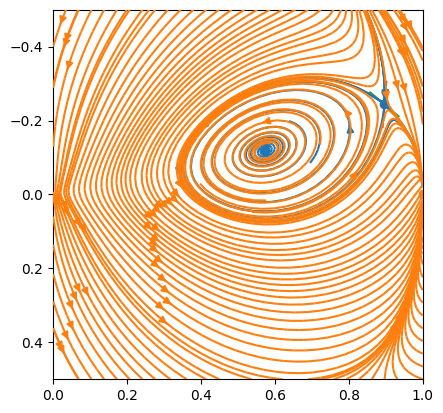

In [255]:
DP_ = np.array([psis[0],psis[0]+d_p1/50,psis[0]-d_p1/50,psis[0]+d_p2/50,psis[0]-d_p2/50,psis[0],psis[1],0],dtype=float)
DR_ = np.array([Rs[0],Rs[0]+d_r1/50,Rs[0]-d_r1/50,Rs[0]+d_r2/50,Rs[0]-d_r2/50,Rs[0],Rs[1],1],dtype=float)
X_ = DR_*np.cos(DP_)
Y_ = DR_*np.sin(DP_)
# Q = plt.quiver(X,Y,U,V,M,pivot='mid',cmap='jet',zorder=3)
seed_points = np.array([(*X_,0.8),(*Y_,-0.2)])
plt.streamplot(X,Y,DX,DY,cmap='jet',zorder=3,start_points=seed_points.T,broken_streamlines=False)
plt.streamplot(X,Y,DX,DY,cmap='jet',zorder=3,broken_streamlines=False)
plt.scatter(Rs*np.cos(psis),Rs*np.sin(psis))

plt.plot(x_[:2],y_[:2])
plt.plot(x_[2:],y_[2:])
# plt.plot((X_0-0.950682959640321/20,X_0+0.950682959640321/20),(Y_0-0.310164327815949/20,Y_0+0.310164327815949/20))
# plt.plot((X_0+0.3875/20,X_0-0.3875/20),(Y_0-0.9254/20,Y_0+0.9254/20))
# plt.plot((0,-0.387),(0,0.9254))
plt.scatter(1,0)
plt.ylim(0.5,-0.5)
plt.xlim(0,1)
plt.gca().set_aspect(1)

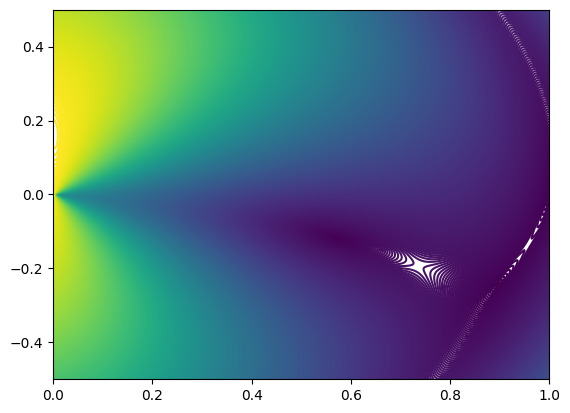

In [258]:
M = (np.hypot(DX,DY))
plt.contour(X,Y,M,levels=1000)

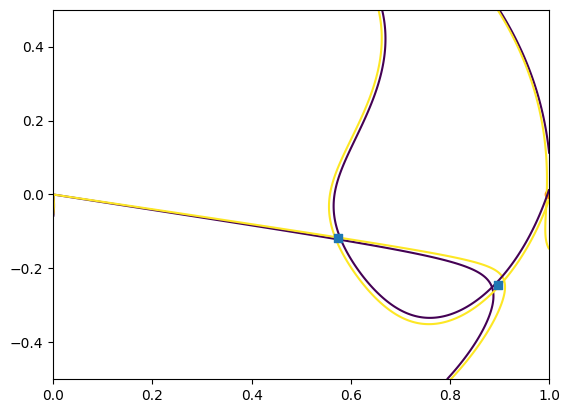

In [254]:
xs = np.linspace(0.0,1,1000)
ys = np.linspace(-0.5,0.5,1000)
X,Y = np.meshgrid(xs,ys)
DX,DY = Fun(X,Y,alpha,mu,nu)
M = (np.hypot(DX,DY))


plt.contour(X,Y,DX,levels=[0-1e-3,0+1e-3])
plt.contour(X,Y,DY,levels=[0-1e-3,0+1e-3])
plt.scatter(Rs*np.cos(psis),Rs*np.sin(psis),zorder=3,marker='s')
plt.scatter(1,0)

In [261]:
JJ

Matrix([
[0.00879871254732119,   0.048897426446488],
[  0.226767245490343, -0.0600083254092994]])

### 결론
우선 논문에 있던 결과는 오류였다는 것을 확인  
실제는 y축 대칭으로 구한거라, 기존 구했던 방법이 맞음  
하지만 stable manifold를 구하는 방법을 모르겠음   
임의의 함수를 생성하고, t->oo 로 갔을때 결과가 나오게 잘 맞추는 것 같은데  
일단 이것은 확인해 봐야 할듯  

Differential Equations and Dynamical Systems (Texts in Applied Mathematics, 7) - Differential Equations and Dynamical Systems (Texts in Applied Mathematics, 7) https://a.co/d/hG2aOGC
위의 논문이나
https://www.researchgate.net/post/How_to_compute_the_unstable_manifold_a_nonlinear_2D_autonomous_dynamical_system
다음 사이트 확인해 보기